https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring/data?select=fifa21_raw_data.csv


About Dataset
Context
Kaggle is notorious for providing pure, clean datasets ready for analysis and model building.

So here I present to you a veeeeery messy and raw dataset of EA Sports' latest installment of their hit FIFA series - FIFA21, which I scraped from sofifa.com

Content
One of the challenges of web scraping is unclean data, and it natural, really. Different front-end developers write the HTML their own way, and that makes the incoming data unpredictable.

You'll definitely learn a lot about data cleaning with this dataset.

Acknowledgements
A huge round of applause for sofifa.com for providing this amazing data!

Inspiration
Convert the height and weight columns to numerical forms
Remove the unnecessary newline characters from all columns that have them.
Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set plot style to ggplot2
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/fifa21 raw data v2.csv', low_memory=False)

# Initial Observations


In [5]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [7]:
# Basic Information
print(df.shape)
print(df.dtypes.value_counts())

(18979, 77)
int64     54
object    23
Name: count, dtype: int64


In [8]:
# Descriptive Statistics for numerical features
df.describe()


,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

- Numerical Features: The dataset contains various player attributes like age, overall rating (↓ova), potential (pot), and many specific skills (e.g., crossing, finishing, dribbling). The age of players ranges from 16 to 53, with an average around 25. The overall rating ranges from 47 to 93, indicating a wide variety of player skills.


In [10]:
# Descriptive Statistics for categorical features
df.describe(include='object')

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
count,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,1013,18979,18979,18979,18979,18979,18979,18979,18979,16384
unique,17920,18852,18979,18979,164,682,131,640,62,79,2,15,1869,24,255,134,1216,5,5,3,3,5,439
top,J. Rodríguez,Danny Rose,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,England,No Club,2019 ~ 2021,CB,180cm,70kg,Right,CB,"Jul 1, 2019","Jun 30, 2021",€1.2M,€2K,€0,3 ★,2★,Medium,Medium,1 ★,1
freq,13,3,1,1,1705,237,1706,2441,1474,1495,14445,3686,1344,770,582,2899,1261,11695,9142,12701,13956,17629,2337


- Categorical Features: Key categorical features include player names, nationalities, and club names. There are 17,920 unique player names and 164 unique nationalities, indicating a diverse set of players. The 'hits' column, which might indicate popularity or some performance metric, has 2,595 missing values.


In [12]:
# Missing Values
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values.head(10)  # Displaying only the top 10 columns with most missing values

Loan Date End      17966
Hits                2595
GK Diving              0
Sliding Tackle         0
Standing Tackle        0
Marking                0
Defending              0
Composure              0
Penalties              0
Vision                 0
dtype: int64

Missing Values:
- Loan Date End: The 'loan_date_end' column has the most missing values (17,966), which is expected as not all players are on loan.
- Hits: The 'hits' column has 2,595 missing values, which may need further investigation or imputation.

In [14]:
# Renaming columns: Convert to snake-case.  replacing spaces with underscores and converting to lowercase
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Displaying the new column names
# df.columns.tolist()


In [15]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


# Data Cleaning Plan
    
1. Handling Missing Values:
    - Decision Making: Decide whether to fill missing values (imputation), drop them, or leave them as-is based on the column's relevance and the nature of its data.
2. Correcting Data Types:
    - Review Data Types: Ensure each column's data type makes sense for its content (e.g., numeric, categorical).
    - Convert Data Types: Change data types where necessary, such as converting strings to numbers or dates.
3. Cleaning Text and Categorical Data:
    - Trim Spaces: Remove extra spaces from string data, which are common in scraped data.
    - Consistent Case: Ensure text data is consistent (e.g., all lower case) to avoid duplication based on case differences.
    - Category Reduction: For columns with many categories, consider grouping less common categories into an 'Other' category.
4. Handling Special Characters:
    - Rename Columns: Columns like '↓ova' might need renaming for easier access and interpretation.
    - Clean Values: Ensure that values within columns are clean and consistent, removing or interpreting special characters as necessary.
5. Dealing with Outliers:
    - Identify Outliers: Check for outliers in numerical data that might skew your analysis.
    - Decision Making: Decide whether to cap, remove, or otherwise adjust these outliers.
6. Dropping Irrelevant Columns:
    - Assess Relevance: Determine if all columns are necessary for your analysis or if some can be dropped to simplify the dataset.
7. Ensuring Consistency:
    - Check for Duplicates: Ensure there are no duplicate rows or unnecessary repeated information.
    - Standardize Formats: Ensure that data like dates and categorizations are consistently formatted.


## 1. Handling Missing Values

1.1 'loan_date_end': Since 94.66% of the values are missing, and this column indicates whether a player is on loan, we'll create a boolean indicator variable. This variable will be True if the player is on loan (i.e., the 'loan_date_end' is not missing) and False, otherwise.


In [19]:
# Step 1.1: Create a boolean for 'loan_date_end'
df['is_on_loan'] = df['loan_date_end'].notna().astype(bool)

df['is_on_loan'].value_counts()

#df['is_on_loan']

is_on_loan
False    17966
True      1013
Name: count, dtype: int64

'loan_date_end' (now 'is_on_loan'): There are 1,013 players on loan (True), and 17,966 that are not (False).

1.2. 'hits': This column represents the sofifa page views and may or may not be important depending on the analysis. With 13.67% missing, we can impute these missing values. A common approach is to use the median or mean, but we should first check the distribution to decide.

In [22]:
# Step 1.2: Examine the distribution of 'hits'
print(df['hits'].describe())


count     16384
unique      439
top           1
freq       2337
Name: hits, dtype: object


This column is not numerical as initially assumed; it's categorical with 450 unique values, and the most common value is '1'. Before deciding on imputation, it's essential to convert this to a numerical format and understand its distribution.


In [24]:
# Convert 'hits' to numeric, coercing errors to NaN (which will then be imputed)
df['hits'] = pd.to_numeric(df['hits'], errors='coerce')

# Now, let's examine the distribution of 'hits' to decide on the imputation method
df['hits'].describe()



count    16356.000000
mean        22.824407
std         62.818120
min          1.000000
25%          2.000000
50%          5.000000
75%         15.000000
max        979.000000
Name: hits, dtype: float64

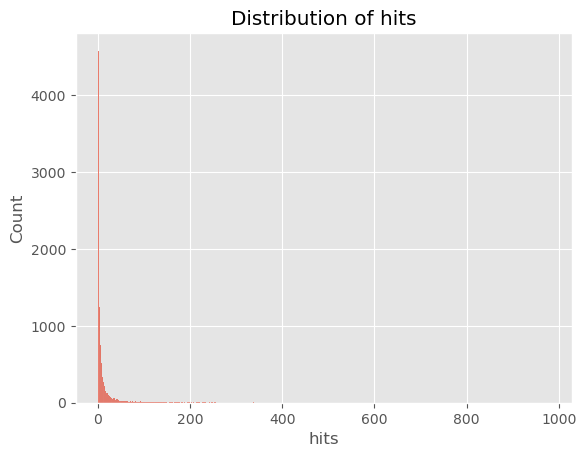

In [25]:
sns.histplot(data=df, x='hits')
plt.title('Distribution of hits')
plt.show()

- Given the right-skewed distribution, the median is likely a more robust measure for imputation than the mean.

In [27]:
# Fill na values with median
median_hits = df['hits'].median()
df['hits'].fillna(median_hits, inplace=True)


In [28]:
df['hits'].isna().sum()

0

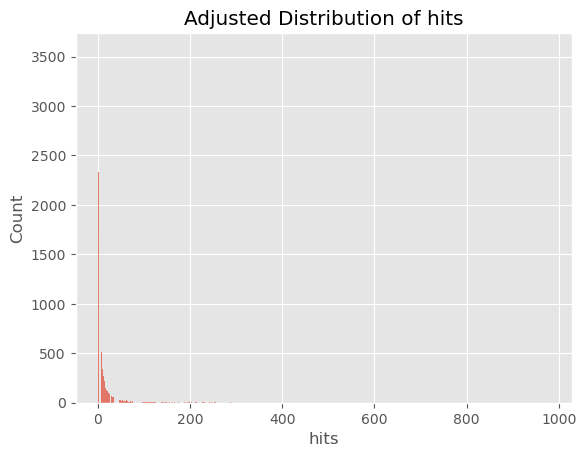

In [29]:
sns.histplot(data=df, x='hits')
plt.title('Adjusted Distribution of hits')
plt.show()

In [30]:
# display all columns
pd.set_option('display.max_rows', None)

# Confirm no remaining misisng values
print(df.isna().sum())

# change max rows to 20
pd.set_option('display.max_rows', 20)

id                      0
name                    0
longname                0
photourl                0
playerurl               0
nationality             0
age                     0
↓ova                    0
pot                     0
club                    0
contract                0
positions               0
height                  0
weight                  0
preferred_foot          0
bov                     0
best_position           0
joined                  0
loan_date_end       17966
value                   0
wage                    0
release_clause          0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
skill                   0
dribbling               0
curve                   0
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility                 0
reactions   

## 2. Correcting Data Types

In [32]:
print(df.dtypes)


id              int64
name           object
longname       object
photourl       object
playerurl      object
               ...   
dri             int64
def             int64
phy             int64
hits          float64
is_on_loan       bool
Length: 78, dtype: object


Here are the current data types of the columns in the dataset:
- Integer (int64): Most numerical columns like 'id', 'dri', 'def', 'phy', 'is_on_loan', etc., are already in integer format, which seems appropriate for ratings and other numerical attributes.
- Floating Point (float64): The 'hits' column is now a float, which is suitable for its imputed values.
- Object (string): Textual and categorical columns like 'name', 'long_name', 'photo_url', etc., are of object type.

Potential Columns for Conversion:
- Date Columns: Any columns representing dates (like 'joined' or 'loan_date_end'), should be converted to datetime format for easier manipulation and analysis.
- High Cardinality Categories: Categorical columns with many unique values might be more memory-efficient as 'category' types, especially if used for modeling later.

In [35]:
# Convert 'joined' to datetime
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')

# Convert 'loan_date_end' to datetime (only for non-missing values)
df['loan_date_end'] = pd.to_datetime(df['loan_date_end'], errors='coerce')

# Verify the conversion
print(df['joined'].dtype)
print(df['loan_date_end'].dtype)


datetime64[ns]
datetime64[ns]


The 'joined' and 'loan_date_end' columns have been successfully converted to datetime format.  This will make any analysis involving dates much more straightforward, such as calculating durations or filtering by specific time periods.

Unique Values in Potential Categorical Columns:

- High Cardinality: Columns like 'name', 'long_name', 'photo_url', and 'player_url' have very high cardinality (many unique values), suggesting they are likely identifiers or URLs.
- Low to Moderate Cardinality: Columns like 'nationality', 'club', 'positions', etc., have fewer unique values, making them good candidates for the 'category' type.

In [38]:
'''

# Identifying potential categorical columns (object type columns)
potential_categorical_cols = df.select_dtypes(include=['object']).columns

# Assessing the number of unique values in each potential categorical column
unique_values = df[potential_categorical_cols].nunique()

# Converting columns to 'category' data type if they have less than 100 unique values.
for col in potential_categorical_cols:
    if unique_values[col] < 100:  # Adjust threshold as necessary
        df[col] = df[col].astype('category')

# Verify changes
updated_data_types = df[potential_categorical_cols].dtypes

print(potential_categorical_cols)
print(unique_values)
print(updated_data_types)

'''


"\n\n# Identifying potential categorical columns (object type columns)\npotential_categorical_cols = df.select_dtypes(include=['object']).columns\n\n# Assessing the number of unique values in each potential categorical column\nunique_values = df[potential_categorical_cols].nunique()\n\n# Converting columns to 'category' data type if they have less than 100 unique values.\nfor col in potential_categorical_cols:\n    if unique_values[col] < 100:  # Adjust threshold as necessary\n        df[col] = df[col].astype('category')\n\n# Verify changes\nupdated_data_types = df[potential_categorical_cols].dtypes\n\nprint(potential_categorical_cols)\nprint(unique_values)\nprint(updated_data_types)\n\n"

- Several columns such as 'nationality', 'club', 'positions', 'height', 'weight', 'preferred_foot', 'best_position', 'value', 'wage', 'w/f', 'sm', 'a/w', 'd/w', and 'ir' have been converted to 'category' based on a threshold of fewer than 100 unique values.

- Columns with very high cardinality or those deemed more appropriate as text (like URLs) remain as 'object' type.

This conversion can lead to more memory-efficient storage and potentially faster operations for certain tasks. It's also beneficial for modeling, as many algorithms handle categorical data more efficiently or require it to be explicitly declared.


Convert 'Height' and 'Weight' to Numeric: These columns likely contain numbers with units. We'll extract the numeric part and convert them to an appropriate format.
Standardize 'Value', 'Wage', and 'Release Clause': These financial-related columns might include currency symbols and abbreviations like 'M' for million or 'K' for thousand. We'll standardize these into numeric values.
Parse 'Joined' and 'Loan Date End' Dates: Convert these to a consistent date format.
Clean and Standardize Categorical and Rating Columns: Such as 'Preferred Foot', 'W/F', 'SM', 'A/W', 'D/W', and 'IR'.

In [41]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False


In [42]:
import pandas as pd
import re
import numpy as np

# Function to extract numeric value and unit from a string
def extract_numeric_and_unit(value):
    match = re.search(r'(\d+\.?\d*)\s*(\w+)', value)
    if match:
        numeric_value = float(match.group(1))
        unit = match.group(2)
        return numeric_value, unit
    return np.nan, np.nan

# Extract numeric values and units for 'height' column
if 'height' in df.columns:
    df[['Height_Value', 'Height_Unit']] = df['height'].apply(lambda x: pd.Series(extract_numeric_and_unit(x)))

# Convert height to inches
def convert_height_to_inches(value, unit):
    if unit == 'cm':
        return value * 0.393701
    elif unit == 'ft':
        return value * 12
    elif unit == 'in':
        return value
    else:
        return np.nan

if 'Height_Value' in df.columns and 'Height_Unit' in df.columns:
    df['Height_in_Inches'] = df.apply(lambda row: convert_height_to_inches(row['Height_Value'], row['Height_Unit']), axis=1)

# Convert height from centimeters to feet and inches format
def cm_to_feet_inches(cm):
    if pd.isnull(cm):  # Check for missing values
        return None
    total_inches = cm * 0.393701
    feet = int(total_inches // 12)
    inches = total_inches % 12
    return f"{feet}ft {inches:.0f}in"

df['Height_in_Feet_Inches'] = df.apply(lambda row: cm_to_feet_inches(row['Height_Value']) if row['Height_Unit'] == 'cm' else np.nan, axis=1)

# Extract numeric values and units for 'weight' column
if 'weight' in df.columns:
    df[['Weight_Value', 'Weight_Unit']] = df['weight'].apply(lambda x: pd.Series(extract_numeric_and_unit(x)))

# Convert weight to pounds
def convert_weight_to_pounds(value, unit):
    if unit == 'kg':
        return value * 2.20462
    elif unit == 'lbs':
        return value
    else:
        return np.nan

if 'Weight_Value' in df.columns and 'Weight_Unit' in df.columns:
    df['Weight_in_Pounds'] = df.apply(lambda row: convert_weight_to_pounds(row['Weight_Value'], row['Weight_Unit']), axis=1)

# Handle non-numeric values in 'age' column
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Display the DataFrame to check the changes
df.head()


,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,Height_Value,Height_Unit,Height_in_Inches,Height_in_Feet_Inches,Weight_Value,Weight_Unit,Weight_in_Pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False,170.0,cm,66.929170,5ft 7in,72.0,kg,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False,187.0,cm,73.622087,6ft 2in,83.0,kg,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False,188.0,cm,74.015788,6ft 2in,87.0,kg,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False,181.0,cm,71.259881,5ft 11in,70.0,kg,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False,175.0,cm,68.897675,5ft 9in,68.0,kg,149.91416


In [43]:
df.isna().sum()

id                        0
name                      0
longname                  0
photourl                  0
playerurl                 0
                         ..
Height_in_Inches         40
Height_in_Feet_Inches    40
Weight_Value              0
Weight_Unit               0
Weight_in_Pounds          0
Length: 85, dtype: int64

# PRIOR CODE

In [45]:
'''

# Display the unique values of 'height' and 'weight' columns to understand their format
# WERE THERE ANY MISSING VALUES?
#height_weight_format = df[['height', 'weight']].dropna().apply(lambda x: x.unique())
#height_weight_format

df['height'].str.contains('cm').sum()


'''



"\n\n# Display the unique values of 'height' and 'weight' columns to understand their format\n# WERE THERE ANY MISSING VALUES?\n#height_weight_format = df[['height', 'weight']].dropna().apply(lambda x: x.unique())\n#height_weight_format\n\ndf['height'].str.contains('cm').sum()\n\n\n"

In [46]:
'''

# Identify whether there are heights in units other than cm's

# Create a boolean mask for rows where the 'height' column doesn't contain 'cm'
mask = ~df['height'].str.contains('cm', na=False)

# Filter the data to those rows
heights_without_cm = df[mask]

# Display the entries without 'cm' in the 'height' column
heights_without_cm[['height']]


'''

"\n\n# Identify whether there are heights in units other than cm's\n\n# Create a boolean mask for rows where the 'height' column doesn't contain 'cm'\nmask = ~df['height'].str.contains('cm', na=False)\n\n# Filter the data to those rows\nheights_without_cm = df[mask]\n\n# Display the entries without 'cm' in the 'height' column\nheights_without_cm[['height']]\n\n\n"

In [47]:
'''


import re

def cm_to_feet_inches(cm):
    if pd.isnull(cm):  # Check for missing values
        return None

    # Conversion factors
    total_inches = cm / 2.54
    feet = int(total_inches // 12)
    inches = total_inches % 12

    # Format and return the result as a string 'Xft Yin'
    return f"{feet}ft {inches:.0f}in"

# Ensure the height column is numeric and apply the conversion function
df['height_feet_inches'] = df['height_cm'].apply(cm_to_feet_inches)

# Display the first few rows to verify the changes
df[['height_cm', 'height_feet_inches']].head()

'''


'\n\n\nimport re\n\ndef cm_to_feet_inches(cm):\n    if pd.isnull(cm):  # Check for missing values\n        return None\n\n    # Conversion factors\n    total_inches = cm / 2.54\n    feet = int(total_inches // 12)\n    inches = total_inches % 12\n\n    # Format and return the result as a string \'Xft Yin\'\n    return f"{feet}ft {inches:.0f}in"\n\n# Ensure the height column is numeric and apply the conversion function\ndf[\'height_feet_inches\'] = df[\'height_cm\'].apply(cm_to_feet_inches)\n\n# Display the first few rows to verify the changes\ndf[[\'height_cm\', \'height_feet_inches\']].head()\n\n'

In [48]:
'''

# Create a boolean mask for rows where the 'height' column doesn't contain 'cm'
mask = ~df['height'].str.contains('cm', na=False)

# Filter the data to those rows
heights_without_cm = df[mask]

# Display the entries without 'cm' in the 'height' column
heights_without_cm[['height', 'height_cm']]
'''


"\n\n# Create a boolean mask for rows where the 'height' column doesn't contain 'cm'\nmask = ~df['height'].str.contains('cm', na=False)\n\n# Filter the data to those rows\nheights_without_cm = df[mask]\n\n# Display the entries without 'cm' in the 'height' column\nheights_without_cm[['height', 'height_cm']]\n"

## 3. Cleaning Text and Categorical Column Data


In [50]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,Height_Value,Height_Unit,Height_in_Inches,Height_in_Feet_Inches,Weight_Value,Weight_Unit,Weight_in_Pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False,170.0,cm,66.929170,5ft 7in,72.0,kg,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False,187.0,cm,73.622087,6ft 2in,83.0,kg,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False,188.0,cm,74.015788,6ft 2in,87.0,kg,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False,181.0,cm,71.259881,5ft 11in,70.0,kg,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False,175.0,cm,68.897675,5ft 9in,68.0,kg,149.91416


In [51]:
df.dtypes

id                         int64
name                      object
longname                  object
photourl                  object
playerurl                 object
                          ...   
Height_in_Inches         float64
Height_in_Feet_Inches     object
Weight_Value             float64
Weight_Unit               object
Weight_in_Pounds         float64
Length: 85, dtype: object

3.1. Trim Spaces:
Extra spaces at the beginning or end of strings can occur during data entry or extraction. These can lead to issues with matching and analysis.

In [53]:
# Trim spaces for object type columns
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = df[col].str.strip()


3.2. Standardize Case:
Inconsistent casing (mix of uppercase and lowercase) in text data can lead to the same category being treated as different ones.

3.3. Simplify Categories:
Categorical columns with a large number of unique values (high cardinality) can complicate analysis and modeling.

In [56]:
# Set a threshold for what you consider a rare category
threshold = 0.01  # Categories representing less than 1% of the data

# Loop through each categorical column
for col in df.select_dtypes(include=['category']).columns:
    # Calculate the frequency of each category as a percentage
    frequencies = df[col].value_counts(normalize=True)
    
    # Identify categories that are below the threshold (rare categories)
    rare_categories = frequencies[frequencies < threshold].index
    
    # Replace rare categories with 'Other'
    df[col] = df[col].replace(rare_categories, 'Other')


3.4. Remove or Replace Special Characters:  Clean up special characters in text columns.


In [58]:
# Identify Text Columns
text_columns = df.select_dtypes(include=['object']).columns

# Replace the 'Star' Character
for col in text_columns:
    df[col] = df[col].str.replace('★', '', regex=False)

# 3. Display the first few rows to verify the changes
df.head()


,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,Height_Value,Height_Unit,Height_in_Inches,Height_in_Feet_Inches,Weight_Value,Weight_Unit,Weight_in_Pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,False,170.0,cm,66.929170,5ft 7in,72.0,kg,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,False,187.0,cm,73.622087,6ft 2in,83.0,kg,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,False,188.0,cm,74.015788,6ft 2in,87.0,kg,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,False,181.0,cm,71.259881,5ft 11in,70.0,kg,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,False,175.0,cm,68.897675,5ft 9in,68.0,kg,149.91416


## 4. Handling Special Characters (Columns)

4.1. Identify Columns with Special Characters: Column names containing special characters or spaces. These might include characters like spaces, hyphens, slashes, or punctuation.



In [61]:
# Identify columns with special characters
special_char_columns = df.columns[df.columns.str.contains(r'[^a-zA-Z0-9_]')]

# Define a renaming strategy: converting to snake_case
def clean_column_name(name):
    name = re.sub(r'[^a-zA-Z0-9\s]', '', name)  # Remove special characters
    name = re.sub(r'\s+', '_', name)  # Replace spaces with underscores
    return name

# Create a mapping of old names to new names
new_column_names = {col: clean_column_name(col) for col in special_char_columns}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Verify the changes
print(df.columns)


Index(['id', 'name', 'longname', 'photourl', 'playerurl', 'nationality', 'age',
       'ova', 'pot', 'club', 'contract', 'positions', 'height', 'weight',
       'preferred_foot', 'bov', 'best_position', 'joined', 'loan_date_end',
       'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'wf', 'sm', 'aw', 'dw', 'ir', 'pac', 'sho', 'pas', 'dri',
       'def', 'phy

4.2. Define a Renaming Strategy: Ensure use of snake-case and update some descriptions that are not easily understandable.

In [63]:
abbreviated_column_mapping = {
    'ova': 'overall_rating',
    'pot': 'potential',
    'bov': 'best_overall_rating',
    'bp': 'best_position',
    'growth': 'growth_ova_minus_pot',
    'value': 'market_value',
    'wage': 'weekly_wage',
    'release_clause': 'release_clause_amount',
    'gk_diving': 'goalkeeper_diving_skill',
    'gk_handling': 'goalkeeper_handling_skill',
    'gk_kicking': 'goalkeeper_kicking_skill',
    'gk_positioning': 'goalkeeper_positioning_skill',
    'gk_reflexes': 'goalkeeper_reflexes_skill',
    'wf': 'weak_foot_rating',
    'sm': 'skill_moves_rating',
    'aw': 'attacking_work_rate',
    'dw': 'defensive_work_rate',
    'ir': 'international_reputation',
    'pac': 'pace_rating',
    'sho': 'shooting_rating',
    'pas': 'passing_rating',
    'dri': 'dribbling_rating',
    'def': 'defending_rating',
    'phy': 'physicality_rating',
    'hits': 'sofifa_page_views'
}

# Apply the mapping to rename the columns
df.rename(columns=abbreviated_column_mapping, inplace=True)

# Display the first few rows to verify the changes
df.head()


,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential,club,contract,positions,height,weight,preferred_foot,best_overall_rating,best_position,joined,loan_date_end,market_value,weekly_wage,release_clause_amount,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,goalkeeper_diving_skill,goalkeeper_handling_skill,goalkeeper_kicking_skill,goalkeeper_positioning_skill,goalkeeper_reflexes_skill,total_stats,base_stats,weak_foot_rating,skill_moves_rating,attacking_work_rate,defensive_work_rate,international_reputation,pace_rating,shooting_rating,passing_rating,dribbling_rating,defending_rating,physicality_rating,sofifa_page_views,is_on_loan,Height_Value,Height_Unit,Height_in_Inches,Height_in_Feet_Inches,Weight_Value,Weight_Unit,Weight_in_Pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,False,170.0,cm,66.929170,5ft 7in,72.0,kg,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,False,187.0,cm,73.622087,6ft 2in,83.0,kg,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,False,188.0,cm,74.015788,6ft 2in,87.0,kg,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,False,181.0,cm,71.259881,5ft 11in,70.0,kg,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,False,175.0,cm,68.897675,5ft 9in,68.0,kg,149.91416


## 5. Dealing with Outliers

This code below uses the median for imputation, which tends to be more robust to outliers.

In [66]:
import numpy as np

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Define a function to impute outliers based on the IQR method
def impute_outliers(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Define the boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute outliers with the median
    median_value = df[col].median()
    df[col] = np.where(df[col] > upper_bound, median_value, df[col])
    df[col] = np.where(df[col] < lower_bound, median_value, df[col])

    return df

# Apply the function to each numeric column
for col in numeric_cols:
    df = impute_outliers(df, col)

# Verify the changes
print(df.describe())  # Print the summary statistics to verify changes


                  id           age  overall_rating     potential  \
count   18979.000000  18979.000000    18979.000000  18979.000000   
mean   227872.717530     25.186258       65.583434     71.077928   
min    155266.000000     16.000000       48.000000     55.000000   
25%    211271.000000     21.000000       61.000000     67.000000   
50%    232418.000000     25.000000       66.000000     71.000000   
75%    246922.500000     29.000000       70.000000     75.000000   
max    259216.000000     41.000000       83.000000     87.000000   
std     23772.039517      4.694720        6.722973      5.885897   

       best_overall_rating                         joined  \
count         18979.000000                          18979   
mean             66.628063  2018-09-13 10:27:42.005374464   
min              49.000000            1998-01-01 00:00:00   
25%              62.000000            2018-01-08 12:00:00   
50%              67.000000            2019-06-25 00:00:00   
75%              71.0

## 6. Dropping Irrelevant Columns

Factors to consider:
    
1. Irrelevant Information
2. Redundant or Derived Data
3. Sparse Data
4. Low Variance
5. Are the columns necessary to my goals or irrelevent to my questions?

6.1 Identify URL and Identifier Columns: Look for columns that contain URLs or specific identifiers that aren't necessary for your analysis.


In [70]:
# Example: Identifying columns that are likely URLs or identifiers
url_or_id_cols = [col for col in df.columns if 'url' in col or 'id' in col]
print("URL or Identifier Columns:", url_or_id_cols)


URL or Identifier Columns: ['id', 'photourl', 'playerurl', 'sliding_tackle']


6.2. Check for High Correlation: Determine if there are pairs of columns with very high correlation, suggesting redundancy.

In [72]:
# Calculate correlation matrix only for numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation matrix

# Identify highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("Highly Correlated Pairs:", highly_correlated_pairs[(highly_correlated_pairs > 0.9) & (highly_correlated_pairs < 1)])


Highly Correlated Pairs: Weight_in_Pounds  Weight_Value        0.998787
Weight_Value      Weight_in_Pounds    0.998787
standing_tackle   defending           0.988103
defending         standing_tackle     0.988103
                  sliding_tackle      0.985254
                                        ...   
defending_rating  interceptions       0.920451
standing_tackle   defending_rating    0.912964
defending_rating  standing_tackle     0.912964
                  sliding_tackle      0.907670
sliding_tackle    defending_rating    0.907670
Length: 32, dtype: float64


6.3. Identify Sparse Columns: Identify columns with a high percentage of missing values.

In [74]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
sparse_columns = missing_percentage[missing_percentage > 60]  # Adjust the threshold as needed
print("Sparse Columns:", sparse_columns)


Sparse Columns: loan_date_end    94.662522
dtype: float64


6.4. Find Columns with Low Variance: Identify columns where almost all the values are the same.

In [76]:
# Identify columns with low variance
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Low Variance Columns:", low_variance_cols)


Low Variance Columns: []


6.5. Consider Specific Goals: Reflect on the columns' relevance to analysis goals and questions.

In [78]:
# Manually review columns based on your understanding and goals
columns_to_consider = []  # Add column names that are irrelevant


In [79]:
# Combine all insights
columns_to_drop = set(url_or_id_cols + sparse_columns.index.tolist() + low_variance_cols + columns_to_consider)

# Review the columns to drop and make a final decision
print("Recommended Columns to Drop:", columns_to_drop)


Recommended Columns to Drop: {'id', 'loan_date_end', 'sliding_tackle', 'playerurl', 'photourl'}


## 7. Ensuring Consistency

1. Check for Duplicate Rows:
Duplicate rows can skew the analysis, leading to incorrect conclusions. Identify and remove any duplicates.


In [82]:
# Identify and drop duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicate rows: 0


2. Standardize Formats:
Ensure that data within each column is consistently formatted, especially for dates, categorical data, and strings.


In [84]:
# Ensure all dates are in the same format-handled previously

# Ensure categorical data is consistently formatted (already mostly handled in previous steps)



3. Validate Against Known Ranges:
Check numerical values against known ranges (e.g., age should be within a reasonable range). Flag or correct values outside these ranges.


In [86]:
# Example: Ensure 'age' is within a reasonable range
reasonable_age_range = (0, 100)  # Adjust as necessary

age = df[df['age'].between(reasonable_age_range[0], reasonable_age_range[1])]



4. Consistent Categorization:
Ensure categorical data is consistently categorized. For instance, the same category shouldn't be spelled in multiple ways.

In [88]:
# Standardize country names (capitalize)

df['nationality'] = df['nationality'].str.title()  


In [89]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential,club,contract,positions,height,weight,preferred_foot,best_overall_rating,best_position,joined,loan_date_end,market_value,weekly_wage,release_clause_amount,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,goalkeeper_diving_skill,goalkeeper_handling_skill,goalkeeper_kicking_skill,goalkeeper_positioning_skill,goalkeeper_reflexes_skill,total_stats,base_stats,weak_foot_rating,skill_moves_rating,attacking_work_rate,defensive_work_rate,international_reputation,pace_rating,shooting_rating,passing_rating,dribbling_rating,defending_rating,physicality_rating,sofifa_page_views,is_on_loan,Height_Value,Height_Unit,Height_in_Inches,Height_in_Feet_Inches,Weight_Value,Weight_Unit,Weight_in_Pounds
0,158023.0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33.0,66.0,71.0,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,67.0,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,263.0,85.0,95.0,70.0,62.0,88.0,269.0,96.0,93.0,41.0,91.0,63.0,451.0,91.0,80.0,91.0,62.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,55.0,75.0,59.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,4,4,Medium,Low,5,85.0,92.0,58.0,64.0,38.0,65.0,5.0,False,170.0,cm,66.929170,5ft 7in,72.0,kg,158.73264
1,232418.0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35.0,66.0,71.0,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,67.0,ST,2018-07-10,NaT,€63M,€220K,€75.9M,263.0,84.0,95.0,90.0,82.0,86.0,414.0,88.0,81.0,76.0,77.0,63.0,431.0,87.0,91.0,87.0,62.0,71.0,302.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,59.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,4,5,High,Low,5,89.0,93.0,81.0,64.0,35.0,77.0,5.0,False,187.0,cm,73.622087,6ft 2in,83.0,kg,182.98346
2,200389.0,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27.0,66.0,71.0,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,67.0,GK,2014-07-16,NaT,€120M,€125K,€159.4M,263.0,13.0,11.0,15.0,43.0,13.0,109.0,61.0,13.0,14.0,40.0,63.0,307.0,43.0,60.0,67.0,62.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,53.0,11.0,11.0,11.0,11.0,11.0,1413.0,356.0,3,1,Medium,Medium,3,87.0,92.0,78.0,64.0,52.0,90.0,5.0,False,188.0,cm,74.015788,6ft 2in,87.0,kg,191.80194
3,192985.0,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29.0,66.0,71.0,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,67.0,CAM,2015-08-30,NaT,€129M,€370K,€161M,407.0,94.0,82.0,55.0,62.0,82.0,441.0,88.0,85.0,83.0,93.0,63.0,398.0,77.0,76.0,78.0,62.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,263.0,76.0,66.0,88.0,55.0,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,1627.0,356.0,5,4,High,High,4,76.0,86.0,58.0,64.0,64.0,78.0,5.0,False,181.0,cm,71.259881,5ft 11in,70.0,kg,154.32340
4,190871.0,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28.0,66.0,71.0,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,67.0,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87.0,87.0,269.0,95.0,88.0,89.0,81.0,63.0,453.0,94.0,89.0,96.0,62.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,49.0,59.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,5,5,High,Medium,5,91.0,85.0,58.0,64.0,36.0,59.0,5.0,False,175.0,cm,68.897675,5ft 9in,68

In [90]:
df.to_csv('partially_clean.csv')